In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
from google.colab import files
uploaded=files.upload()

Saving footfalls.csv to footfalls.csv


In [3]:
Walmart = pd.read_csv("footfalls.csv")
Walmart[:3]

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0


In [27]:
len(Walmart)

159

<Axes: >

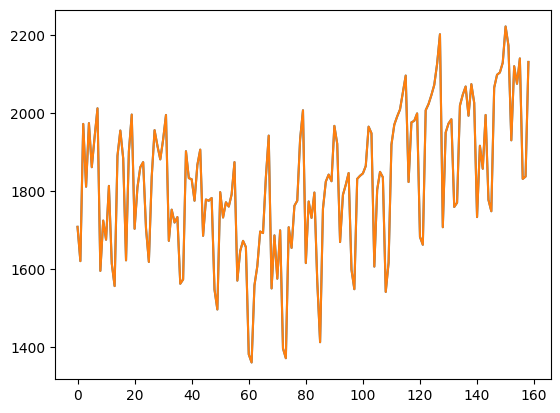

In [4]:
Walmart.Footfalls.plot()
Walmart['Footfalls'].plot()

In [5]:
# Splitting data
print(len(Walmart['Footfalls']))
Train = Walmart.head(147)
Test = Walmart.tail(12)
print(Train)
print(Test)

159
      Month  Footfalls    t  log_footfalls  t_square  Jan  Feb  Mar  Apr  May  \
0    Jan-91       1709    1       7.443664         1    1    0    0    0    0   
1    Feb-91       1621    2       7.390799         4    0    1    0    0    0   
2    Mar-91       1973    3       7.587311         9    0    0    1    0    0   
3    Apr-91       1812    4       7.502186        16    0    0    0    1    0   
4    May-91       1975    5       7.588324        25    0    0    0    0    1   
..      ...        ...  ...            ...       ...  ...  ...  ...  ...  ...   
142  Nov-02       1858  143       7.527256     20449    0    0    0    0    0   
143  Dec-02       1996  144       7.598900     20736    0    0    0    0    0   
144  Jan-03       1778  145       7.483244     21025    1    0    0    0    0   
145  Feb-03       1749  146       7.466799     21316    0    1    0    0    0   
146  Mar-03       2066  147       7.633370     21609    0    0    1    0    0   

     Jun  Jul  Aug  Sep

# Moving Average

In [ ]:
list(range(2,15,3))

[2, 5, 8, 11, 14]

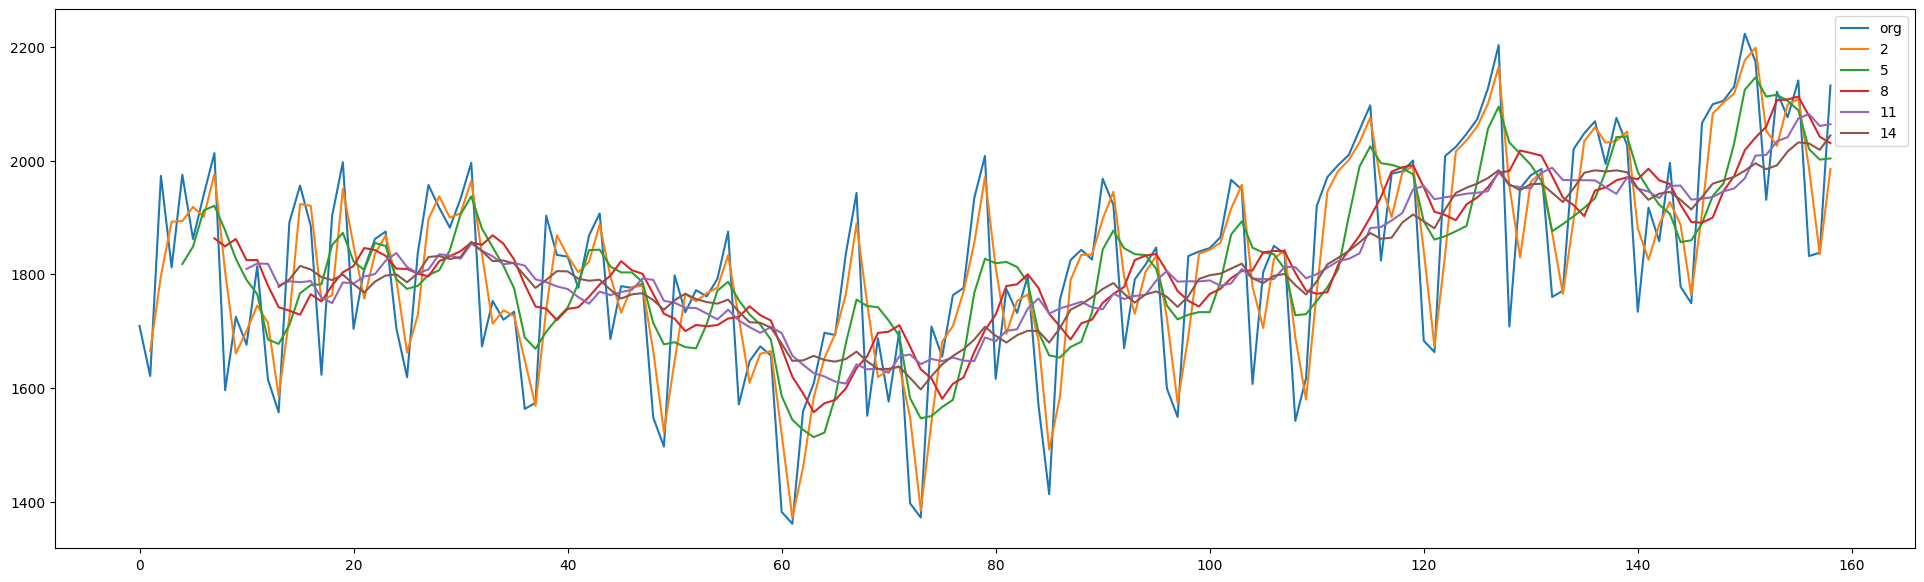

In [6]:
plt.figure(figsize=(24,7))
Walmart.Footfalls.plot(label="org")
for i in range(2,15,3):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')  #Location of legend

# Time series decomposition plot


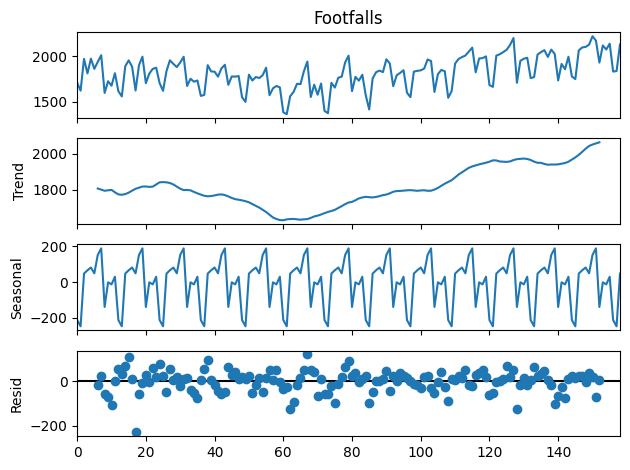

In [7]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


A partial autocorrelation (PACF) is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

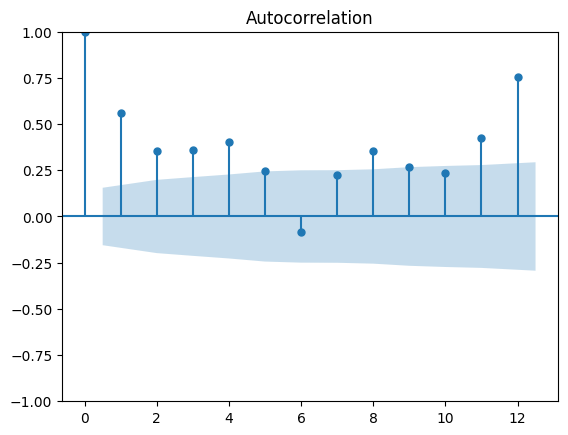

In [8]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
#tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()

### Evaluation Metric MAPE

In [9]:
#Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
100*0.1 + 95*0.2 + 90*0.3 + 85*0.4

In [10]:
#Weighted Moving Average
import pandas as pd
import numpy as np
df = pd.DataFrame({'X':range(100,30, -5)})
weights = np.array([0.1, 0.2, 0.3, 0.4])
df['MA'] = df['X'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,X,MA
0,100,NaN
1,95,NaN
2,90,NaN
3,85,90.0
4,80,85.0
5,75,80.0
6,70,75.0
7,65,70.0
8,60,65.0
9,55,60.0


In [11]:
#Weighted Moving Average
import pandas as pd
import numpy as np
df=pd.DataFrame()
df['Month']=Walmart["Month"]
df['Footfalls']=Walmart["Footfalls"]
weights = np.array([0.1, 0.2, 0.3, 0.4])
df['WMA'] = df['Footfalls'].rolling(4).apply(lambda x: np.sum(weights*x))
df['Error']=df['Footfalls'] - df['WMA']
MAPE(df['WMA'],df['Footfalls'])

4.300571577726246

In [ ]:
df

,Month,Footfalls,WMA,Error
0,Jan-91,1709,NaN,NaN
1,Feb-91,1621,NaN,NaN
2,Mar-91,1973,1814.6,158.4
3,Apr-91,1812,1822.1,-10.1
4,May-91,1975,1925.7,49.3
...,...,...,...,...
154,Nov-03,2076,2060.5,15.5
155,Dec-03,2141,2117.5,23.5
156,Jan-04,1832,1973.5,-141.5
157,Feb-04,1838,1896.8,-58.8


In [12]:
weights = np.array([0.2, 0.3, 0.5])
df['WMA'] = df['Footfalls'].rolling(3).apply(lambda x: np.sum(weights*x))
df['Error']=df['Footfalls'] - df['WMA']
MAPE(df['WMA'],df['Footfalls'])

3.55366603891664

### Simple Exponential Method


In [14]:
#Alpha -> between 0 to 1
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=1)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


5.025197974690909

### Holt method

In [23]:
#Holt method
#Alpha (smoothing_level)-> between 0 to 1
#Beta (smoothing_slope)-> between 0 to 1
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.9, smoothing_slope=0.05)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls)

<ipython-input-23-7ca2fd0ecf41>:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.9, smoothing_slope=0.05)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


5.296237544492837

### Holts winter exponential smoothing with additive seasonality and additive trend


In [24]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls)

2.0083954068872694

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [25]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

2.9678498441563517

## Final Model by combining train and test

In [26]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit()

In [ ]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(12)

,0
159,2153.270022
160,2180.806271
161,2155.360593
162,2244.062090
163,2274.339502
164,1965.419562
165,2125.253616
166,2106.353304
167,2152.544112
168,1903.654840


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving daily-minimum-temperatures.csv to daily-minimum-temperatures.csv


In [ ]:
import pandas as pd
temp=pd.read_csv('daily-minimum-temperatures.csv')
temp=temp.iloc[0:365,:]
temp['Naive Forecast']=temp['Temp'].shift(1)
temp

,Date,Temp,Naive Forecast
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
...,...,...,...
360,1981-12-27,15.5,14.0
361,1981-12-28,13.3,15.5
362,1981-12-29,15.6,13.3
363,1981-12-30,15.2,15.6


In [ ]:
temp['Error']=temp['Temp'] - temp['Naive Forecast']
temp

,Date,Temp,Naive Forecast,Error
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2
...,...,...,...,...
360,1981-12-27,15.5,14.0,1.5
361,1981-12-28,13.3,15.5,-2.2
362,1981-12-29,15.6,13.3,2.3
363,1981-12-30,15.2,15.6,-0.4


In [ ]:
#Mean Error
temp['Error'].mean()

-0.009065934065934068

In [ ]:
import numpy as np
temp['Absolute Error']=np.abs(temp['Error'])
temp[0:3]

,Date,Temp,Naive Forecast,Error,Absolute Error
0,1981-01-01,20.7,NaN,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8,2.8
2,1981-01-03,18.8,17.9,0.9,0.9


In [ ]:
#Mean Absolute Deviation
temp['Absolute Error'].mean()

2.1480769230769234

In [ ]:
temp['Error Squared']=temp['Error']**2
temp[0:3]

,Date,Temp,Naive Forecast,Error,Absolute Error,Error Squared
0,1981-01-01,20.7,NaN,NaN,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8,2.8,7.84
2,1981-01-03,18.8,17.9,0.9,0.9,0.81


In [ ]:
#Mean Squared Error
temp['Error Squared'].mean()

7.418598901098901

In [ ]:
#Root Mean Squared Error
np.sqrt(temp['Error Squared'].mean())

2.723710502439439

In [ ]:
temp['Error/Actual'] = temp['Error']/temp['Temp']
temp[0:3]

,Date,Temp,Naive Forecast,Error,Absolute Error,Error Squared,Error/Actual
0,1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8,2.8,7.84,-0.156425
2,1981-01-03,18.8,17.9,0.9,0.9,0.81,0.047872


In [ ]:
#Mean Percentage Error
temp['Error/Actual'].mean()

-0.04137594911588329

In [ ]:
temp['Abs Error/Actual']= np.abs(temp['Error/Actual'])
temp[0:3]

,Date,Temp,Naive Forecast,Error,Absolute Error,Error Squared,Error/Actual,Abs Error/Actual
0,1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8,2.8,7.84,-0.156425,0.156425
2,1981-01-03,18.8,17.9,0.9,0.9,0.81,0.047872,0.047872


In [ ]:
#Mean Absolute Percentage Error (MAPE)
temp['Abs Error/Actual'].mean()

0.22403404357208617

In [ ]:
def fun(days, upper_limit, lower_limit):
  return upper_limit - (((upper_limit-lower_limit)/31)*days)

In [ ]:
fun(31,266,145.9)

145.9